# Simple Regressors with groupkfold
Including the following: Simple Bias, Simple Linear, Ridge, and Lasso Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, GroupKFold
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
X1_train = pd.read_csv('X1_train.csv')
print(X1_train.shape)
X1_train.head(3)

(813, 32)


,agricultural_land%,forest_land%,land_area,trade_in_services%,control_of_corruption_estimate,access_to_electricity%,renewvable_energy_consumption%,CO2_emisions,other_greenhouse_emisions,population_density,...,regulatory_quality_estimate,government_expenditure_on_education%,government_health_expenditure%,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,intentional_homicides
0,-0.085836,-0.152721,-0.399383,0.246248,-0.858644,0.383715,0.255218,-0.282704,-0.299997,-0.124084,...,-0.367561,-0.883624,-0.784336,-0.554441,-0.817119,0.464130,-0.297990,-0.241818,-0.188357,-0.254264
1,0.068972,-0.142467,-0.399383,0.285449,-0.853645,0.397989,0.425933,-0.282038,-0.299600,-0.135252,...,-0.088963,-0.908635,-0.816195,-0.558421,-0.495422,0.543668,-0.298296,-0.243193,-0.243058,-0.141109
2,0.043107,-0.136912,-0.399383,0.134583,-0.901404,0.406433,0.661555,-0.282297,-0.299804,-0.136993,...,-0.122263,-0.700246,-0.719836,-0.530677,-0.292264,0.548209,-0.298344,-0.243768,-0.257568,-0.190792


In [3]:
X1_test = pd.read_csv('X1_test.csv')
print(X1_test.shape)
X1_test.head(3)

(216, 32)


,agricultural_land%,forest_land%,land_area,trade_in_services%,control_of_corruption_estimate,access_to_electricity%,renewvable_energy_consumption%,CO2_emisions,other_greenhouse_emisions,population_density,...,regulatory_quality_estimate,government_expenditure_on_education%,government_health_expenditure%,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_estimate,intentional_homicides
0,0.136730,-0.465156,-0.398352,0.063243,1.137122,0.411828,-1.016253,-0.207171,-0.229514,1.020816,...,1.180557,0.677640,1.187351,-0.596512,0.295533,0.791354,-0.261786,-0.252620,1.158562,-0.29131
1,0.133997,-0.461171,-0.398352,0.202357,1.151910,0.411828,-0.991801,-0.205041,-0.227806,1.033955,...,1.163943,1.244900,1.410141,-0.573771,0.400434,0.776349,-0.261387,-0.252648,1.119936,-0.29131
2,0.131093,-0.457186,-0.398352,0.206957,1.238729,0.411828,-0.950901,-0.210204,-0.231896,1.047444,...,1.057328,1.332046,1.685723,-0.585142,0.330500,0.828152,-0.260978,-0.252674,1.143365,-0.29131


In [4]:
y_train = pd.read_csv('y_train.csv')
print(y_train.shape)
y_train.head(3)

(813, 1)


,gini_next
0,30.0
1,29.0
2,34.6


In [5]:
y_test = pd.read_csv('y_test.csv')
print(y_test.shape)
y_test.head(3)

(216, 1)


,gini_next
0,28.4
1,28.6
2,28.4


In [6]:
X2_train = pd.read_csv('X2_train.csv')
X3_train = pd.read_csv('X3_train.csv')
X2_test = pd.read_csv('X2_test.csv')
X3_test = pd.read_csv('X3_test.csv')

In [7]:
groups_train = pd.read_csv('groups_train.csv')['country']
groups_train.head(2)

0    Albania
1    Albania
Name: country, dtype: object

## Simple Bias Regression

In [8]:
# 1. Calculate the mean of the target variable
mean_target = np.mean(y_train)

# 2. Make predictions (predict the mean for all instances)
y_pred_bias = np.full_like(y_test, mean_target)

# 3. Evaluate the model 
mse_bias = mean_squared_error(y_test, y_pred_bias)
r2_bias = r2_score(y_test, y_pred_bias)

print(f"Bias Regressor Prediction (mean of target): {mean_target}")
print(f"R^2 of Bias Regressor: {r2_bias}")

Bias Regressor Prediction (mean of target): 35.95375153751538
R^2 of Bias Regressor: -0.022566125702707218


## Linear Regression

#### X1

In [9]:
# Lin reg
lr = LinearRegression()
lr.fit(X1_train,y_train)
print('Test R2:',lr.score(X1_test, y_test))

Test R2: 0.3993074592518191


In [10]:
# 1) Find the best and worst result from linear regression
y_pred = lr.predict(X1_test)

# Compare predictions with actual values
comparison = pd.DataFrame({
    'actual': y_test.iloc[:,0],
    'predicted': y_pred[:,0],
    'diff': y_test.iloc[:,0] - y_pred[:,0]
})
comparison['abs_diff'] = comparison['diff'].abs()
print(comparison.head(10))  
comparison.sort_values(by='abs_diff', ascending=False)

   actual  predicted      diff  abs_diff
0    28.4  30.936636 -2.536636  2.536636
1    28.6  29.719242 -1.119242  1.119242
2    28.4  30.151217 -1.751217  1.751217
3    28.1  29.502134 -1.402134  1.402134
4    27.5  28.931341 -1.431341  1.431341
5    27.7  28.805322 -1.105322  1.105322
6    28.1  28.594605 -0.494605  0.494605
7    27.7  28.868974 -1.168974  1.168974
8    27.6  28.818418 -1.218418  1.218418
9    27.4  28.723480 -1.323480  1.323480


,actual,predicted,diff,abs_diff
132,61.0,42.351055,18.648945,18.648945
133,59.1,41.179160,17.920840,17.920840
201,28.7,45.188467,-16.488467,16.488467
83,42.6,26.204709,16.395291,16.395291
94,37.8,21.469836,16.330164,16.330164
...,...,...,...,...
117,42.4,42.227438,0.172562,0.172562
23,41.6,41.506813,0.093187,0.093187
118,42.6,42.655267,-0.055267,0.055267
147,43.9,43.850149,0.049851,0.049851


In [11]:
# 2) Examine the coefficients (weights) learned 
results = pd.DataFrame()
results['features'] = X1_train.columns
results['coeff'] = lr.coef_[0]
results['abs_coeff'] = results['coeff'].abs()
results.sort_values(by='abs_coeff', ascending=False)

,features,coeff,abs_coeff
8,other_greenhouse_emisions,18.781075,18.781075
7,CO2_emisions,-15.979008,15.979008
29,rural_population,-6.647337,6.647337
28,population,5.311137,5.311137
26,death_rate,-2.931181,2.931181
30,voice_and_accountability_estimate,2.689438,2.689438
1,forest_land%,2.611639,2.611639
27,life_expectancy_at_birth,-2.369693,2.369693
12,research_and_development_expenditure%,-2.185052,2.185052
31,intentional_homicides,1.447586,1.447586


#### X2

In [12]:
# Lin reg
lr = LinearRegression()
lr.fit(X2_train,y_train)
print('Test R2:',lr.score(X2_test, y_test))
# 1) Find the best and worst result from linear regression
y_pred = lr.predict(X2_test)

# Compare predictions with actual values
comparison = pd.DataFrame({
    'actual': y_test.iloc[:,0],
    'predicted': y_pred[:,0],
    'diff': y_test.iloc[:,0] - y_pred[:,0]
})
comparison['abs_diff'] = comparison['diff'].abs()
print(comparison.head(10))  
comparison.sort_values(by='abs_diff', ascending=False)

Test R2: 0.5349015051054975
   actual  predicted      diff  abs_diff
0    28.4  31.259255 -2.859255  2.859255
1    28.6  29.880951 -1.280951  1.280951
2    28.4  30.560307 -2.160307  2.160307
3    28.1  31.098671 -2.998671  2.998671
4    27.5  30.106201 -2.606201  2.606201
5    27.7  29.491921 -1.791921  1.791921
6    28.1  28.346143 -0.246143  0.246143
7    27.7  28.331737 -0.631737  0.631737
8    27.6  27.132053  0.467947  0.467947
9    27.4  25.722424  1.677576  1.677576


,actual,predicted,diff,abs_diff
147,43.9,58.380373,-14.480373,14.480373
84,42.6,28.950952,13.649048,13.649048
132,61.0,47.815101,13.184899,13.184899
131,30.7,43.683234,-12.983234,12.983234
85,41.4,28.610689,12.789311,12.789311
...,...,...,...,...
184,28.8,28.745553,0.054447,0.054447
141,28.2,28.164853,0.035147,0.035147
186,29.3,29.289824,0.010176,0.010176
157,34.2,34.209049,-0.009049,0.009049


In [13]:
# 2) Examine the coefficients (weights) learned 
results = pd.DataFrame()
results['features'] = X2_train.columns
results['coeff'] = lr.coef_[0]
results['abs_coeff'] = results['coeff'].abs()
results.sort_values(by='abs_coeff', ascending=False)

,features,coeff,abs_coeff
2,land_area,337.192150,337.192150
48,land_area_rollmean,-336.734680,336.734680
60,rural_population_rollmean,-116.302249,116.302249
28,population,104.602633,104.602633
29,rural_population,101.866041,101.866041
...,...,...,...
10,inflation_annual%,-0.080411,0.080411
77,individuals_using_internet%_rollstd,0.077478,0.077478
93,tax_revenue%_rollstd,-0.076059,0.076059
82,military_expenditure%_rollstd,-0.048007,0.048007


In [16]:
results.sort_values(by='abs_coeff', ascending=False).head(10)

,features,coeff,abs_coeff
2,land_area,337.192150,337.192150
48,land_area_rollmean,-336.734680,336.734680
60,rural_population_rollmean,-116.302249,116.302249
28,population,104.602633,104.602633
29,rural_population,101.866041,101.866041
53,population_rollmean,-82.029047,82.029047
51,other_greenhouse_emisions_rollmean,-68.450268,68.450268
8,other_greenhouse_emisions,56.757456,56.757456
32,CO2_emisions_rollmean,50.811032,50.811032
7,CO2_emisions,-38.841403,38.841403


#### X3

In [14]:
# Lin reg
lr = LinearRegression()
lr.fit(X3_train,y_train)
print('Test R2:',lr.score(X3_test, y_test))
# 1) Find the best and worst result from linear regression
y_pred = lr.predict(X3_test)

# Compare predictions with actual values
comparison = pd.DataFrame({
    'actual': y_test.iloc[:,0],
    'predicted': y_pred[:,0],
    'diff': y_test.iloc[:,0] - y_pred[:,0]
})
comparison['abs_diff'] = comparison['diff'].abs()
print(comparison.head(10))  
comparison.sort_values(by='abs_diff', ascending=False)

Test R2: 0.4303689648429473
   actual  predicted      diff  abs_diff
0    28.4  28.878706 -0.478706  0.478706
1    28.6  29.493819 -0.893819  0.893819
2    28.4  29.745986 -1.345986  1.345986
3    28.1  29.397064 -1.297064  1.297064
4    27.5  28.844002 -1.344002  1.344002
5    27.7  28.188207 -0.488207  0.488207
6    28.1  27.001104  1.098896  1.098896
7    27.7  26.514521  1.185479  1.185479
8    27.6  27.453945  0.146055  0.146055
9    27.4  26.456797  0.943203  0.943203


,actual,predicted,diff,abs_diff
201,28.7,46.149259,-17.449259,17.449259
87,39.9,22.945166,16.954834,16.954834
89,39.7,23.611032,16.088968,16.088968
86,41.3,25.697364,15.602636,15.602636
92,38.6,23.186407,15.413593,15.413593
...,...,...,...,...
208,32.7,32.639773,0.060227,0.060227
205,33.7,33.751007,-0.051007,0.051007
139,28.1,28.150954,-0.050954,0.050954
181,28.4,28.367203,0.032797,0.032797


In [15]:
# 2) Examine the coefficients (weights) learned 
results = pd.DataFrame()
results['features'] = X3_train.columns
results['coeff'] = lr.coef_[0]
results['abs_coeff'] = results['coeff'].abs()
results.sort_values(by='abs_coeff', ascending=False)

,features,coeff,abs_coeff
156,rural_population_lag4,-977.544825,977.544825
112,land_area_lag3,-899.372280,899.372280
124,rural_population_lag3,878.662926,878.662926
85,population_lag2,-858.187580,858.187580
80,land_area_lag2,805.306095,805.306095
...,...,...,...
107,government_expenditure_on_education%_lag3,-0.066915,0.066915
65,GDP_current_US_lag2,0.047583,0.047583
14,tax_revenue%,-0.047302,0.047302
133,central_goverment_debt%_lag4,-0.046974,0.046974


## Ridge Regression

#### X1


best alpha = {'alpha': 100}   valid R2 = 0.372


death_rate                              -1.849823
research_and_development_expenditure%   -1.550463
individuals_using_internet%             -0.996628
rural_population                        -0.781623
access_to_electricity%                  -0.746717
government_expenditure_on_education%    -0.679523
inflation_annual%                       -0.579697
life_expectancy_at_birth                -0.511420
expense%                                -0.497575
political_stability_estimate            -0.468466
real_interest_rate                      -0.458812
rule_of_law_estimate                    -0.423233
population_density                      -0.307288
regulatory_quality_estimate             -0.244631
tax_revenue%                            -0.061061
population                              -0.055974
goverment_effectiveness_estimate        -0.016016
trade_in_services%                      -0.013762
central_goverment_debt%                  0.091304
birth_rate                               0.102340


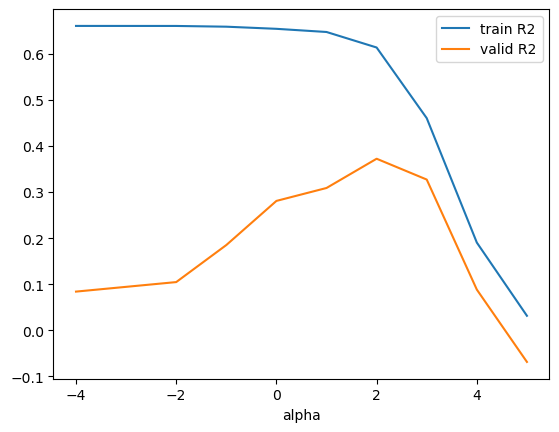

In [16]:
# regularize
gkf = GroupKFold(n_splits=5)
grid = {'alpha':[0.0001,0.01,0.1,1,10,100,1000,10000,100000]}
ridge = Ridge()
ridgeCV = GridSearchCV(
    ridge,
    param_grid=grid,
    cv=gkf.split(X1_train, y_train, groups=groups_train), # grouping occurs here
    scoring='r2',
    return_train_score=True)
ridgeCV.fit(X1_train,y_train)

print()
print('best alpha =',ridgeCV.best_params_, '  valid R2 =',ridgeCV.best_score_.round(3))

results = pd.DataFrame()
results['alpha'] = np.log10(grid['alpha'])
results['train R2'] = ridgeCV.cv_results_['mean_train_score']
results['valid R2']  = ridgeCV.cv_results_['mean_test_score']
ax1 = results.plot.line(x='alpha',y='train R2')
results.plot.line(x='alpha',y='valid R2',ax=ax1)

ridge = ridgeCV.best_estimator_
coef = pd.Series(ridge.coef_,index=X1_train.columns)
coef.sort_values()

In [17]:
test_score = ridge.score(X1_test, y_test)
print('Test R²:', test_score)

Test R²: 0.34702691262387897


#### X2


best alpha = {'alpha': 1000}   valid R2 = 0.402


death_rate                                       -0.476617
death_rate_rollmean                              -0.470254
research_and_development_expenditure%_rollmean   -0.351988
individuals_using_internet%_rollmean             -0.334272
research_and_development_expenditure%            -0.327260
                                                    ...   
forest_land%                                      0.585724
forest_land%_rollmean                             0.593954
forest_land%_rollstd                              0.651349
intentional_homicides                             0.668969
intentional_homicides_rollmean                    0.733570
Length: 96, dtype: float64

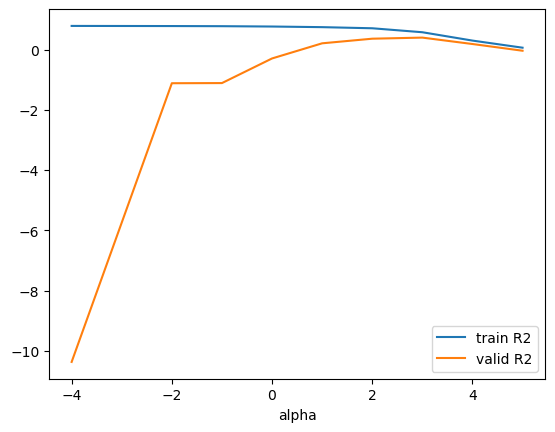

In [18]:
# regularize
gkf = GroupKFold(n_splits=5)
grid = {'alpha':[0.0001,0.01,0.1,1,10,100,1000,10000,100000]}
ridge = Ridge()
ridgeCV = GridSearchCV(
    ridge,
    param_grid=grid,
    cv=gkf.split(X2_train, y_train, groups=groups_train),
    scoring='r2',
    return_train_score=True)
ridgeCV.fit(X2_train,y_train)

print()
print('best alpha =',ridgeCV.best_params_, '  valid R2 =',ridgeCV.best_score_.round(3))

results = pd.DataFrame()
results['alpha'] = np.log10(grid['alpha'])
results['train R2'] = ridgeCV.cv_results_['mean_train_score']
results['valid R2']  = ridgeCV.cv_results_['mean_test_score']
ax1 = results.plot.line(x='alpha',y='train R2')
results.plot.line(x='alpha',y='valid R2',ax=ax1)

ridge = ridgeCV.best_estimator_
coef = pd.Series(ridge.coef_,index=X2_train.columns)
coef.sort_values()

In [19]:
test_score = ridge.score(X2_test, y_test)
print('Test R²:', test_score)

Test R²: 0.4256191542749267


#### X3


best alpha = {'alpha': 1000}   valid R2 = 0.402


death_rate_lag4                              -0.293495
death_rate                                   -0.291075
death_rate_lag3                              -0.284311
research_and_development_expenditure%_lag4   -0.282330
death_rate_lag2                              -0.279985
                                                ...   
forest_land%_lag2                             0.361425
forest_land%_lag3                             0.365590
intentional_homicides_lag3                    0.368632
forest_land%_lag4                             0.369396
intentional_homicides_lag4                    0.430220
Length: 160, dtype: float64

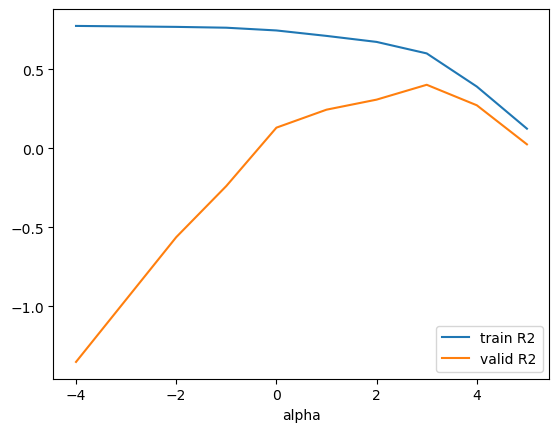

In [20]:
# regularize
gkf = GroupKFold(n_splits=5)
grid = {'alpha':[0.0001,0.01,0.1,1,10,100,1000,10000,100000]}
ridge = Ridge()
ridgeCV = GridSearchCV(
    ridge,
    param_grid=grid,
    cv=gkf.split(X3_train, y_train, groups=groups_train),
    scoring='r2',
    return_train_score=True)
ridgeCV.fit(X3_train,y_train)

print()
print('best alpha =',ridgeCV.best_params_, '  valid R2 =',ridgeCV.best_score_.round(3))

results = pd.DataFrame()
results['alpha'] = np.log10(grid['alpha'])
results['train R2'] = ridgeCV.cv_results_['mean_train_score']
results['valid R2']  = ridgeCV.cv_results_['mean_test_score']
ax1 = results.plot.line(x='alpha',y='train R2')
results.plot.line(x='alpha',y='valid R2',ax=ax1)

ridge = ridgeCV.best_estimator_
coef = pd.Series(ridge.coef_,index=X3_train.columns)
coef.sort_values()

In [21]:
test_score = ridge.score(X3_test, y_test)
print('Test R²:', test_score)

Test R²: 0.38434474459907064


## Lasso Regression

#### X1

/opt/miniforge3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.478e+03, tolerance: 3.589e+00
  model = cd_fast.enet_coordinate_descent(
/opt/miniforge3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.943e+03, tolerance: 3.410e+00
  model = cd_fast.enet_coordinate_descent(
/opt/miniforge3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.430e+03, to


best alpha = {'alpha': 0.01}   valid R2 = 0.293


/opt/miniforge3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.199e+01, tolerance: 4.444e+00
  model = cd_fast.enet_coordinate_descent(


rural_population                        -4.236564
death_rate                              -2.911919
life_expectancy_at_birth                -2.275811
research_and_development_expenditure%   -2.188612
birth_rate                              -1.190614
access_to_electricity%                  -1.055034
rule_of_law_estimate                    -1.050080
government_expenditure_on_education%    -0.948717
individuals_using_internet%             -0.938910
regulatory_quality_estimate             -0.934156
political_stability_estimate            -0.791361
GDP_current_US                          -0.709954
real_interest_rate                      -0.628429
inflation_annual%                       -0.623169
expense%                                -0.592797
population_density                      -0.186104
trade_in_services%                      -0.071518
CO2_emisions                             0.000000
tax_revenue%                             0.102694
central_goverment_debt%                  0.127159


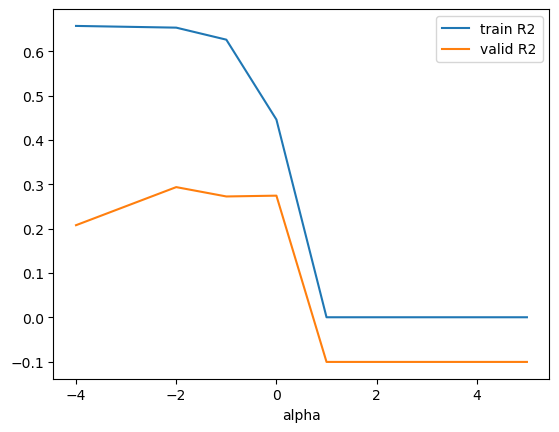

In [22]:
# regularize
gkf = GroupKFold(n_splits=5)
grid = {'alpha':[0.0001,0.01,0.1,1,10,100,1000,10000,100000]}
lasso = Lasso()
lassoCV = GridSearchCV(
    lasso,
    param_grid=grid,
    cv=gkf.split(X1_train, y_train, groups=groups_train),
    scoring='r2',
    return_train_score=True)
lassoCV.fit(X1_train,y_train)

print()
print('best alpha =',lassoCV.best_params_, '  valid R2 =',lassoCV.best_score_.round(3))

results = pd.DataFrame()
results['alpha'] = np.log10(grid['alpha'])
results['train R2'] = lassoCV.cv_results_['mean_train_score']
results['valid R2']  = lassoCV.cv_results_['mean_test_score']
ax1 = results.plot.line(x='alpha',y='train R2')
results.plot.line(x='alpha',y='valid R2',ax=ax1)

lasso = lassoCV.best_estimator_
coef = pd.Series(lasso.coef_,index=X1_train.columns)
coef.sort_values()

In [23]:
test_score = lasso.score(X1_test, y_test)
print('Test R²:', test_score)

Test R²: 0.3563447569829714


#### X2

/opt/miniforge3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.740e+03, tolerance: 3.589e+00
  model = cd_fast.enet_coordinate_descent(
/opt/miniforge3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.160e+03, tolerance: 3.410e+00
  model = cd_fast.enet_coordinate_descent(
/opt/miniforge3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.852e+03, to


best alpha = {'alpha': 0.1}   valid R2 = 0.326


research_and_development_expenditure%_rollmean   -1.527653
intentional_homicides_rollstd                    -1.362091
access_to_electricity%_rollmean                  -1.308682
death_rate                                       -0.872772
death_rate_rollmean                              -0.868172
                                                    ...   
other_greenhouse_emisions                         1.175112
forest_land%_rollstd                              1.206219
voice_and_accountability_estimate_rollmean        1.445397
forest_land%_rollmean                             1.855221
intentional_homicides_rollmean                    2.750328
Length: 96, dtype: float64

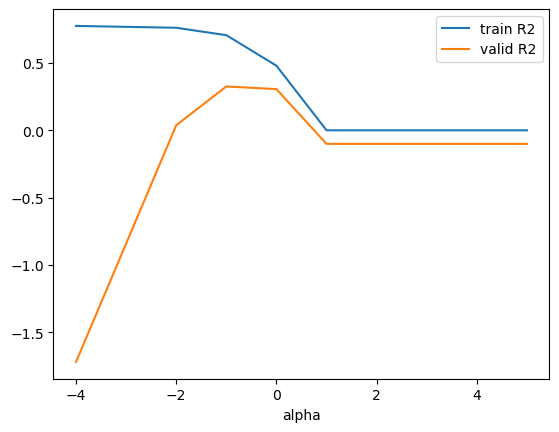

In [24]:
# regularize
gkf = GroupKFold(n_splits=5)
grid = {'alpha':[0.0001,0.01,0.1,1,10,100,1000,10000,100000]}
lasso = Lasso()
lassoCV = GridSearchCV(
    lasso,
    param_grid=grid,
    cv=gkf.split(X2_train, y_train, groups=groups_train),
    scoring='r2',
    return_train_score=True)
lassoCV.fit(X2_train,y_train)

print()
print('best alpha =',lassoCV.best_params_, '  valid R2 =',lassoCV.best_score_.round(3))

results = pd.DataFrame()
results['alpha'] = np.log10(grid['alpha'])
results['train R2'] = lassoCV.cv_results_['mean_train_score']
results['valid R2']  = lassoCV.cv_results_['mean_test_score']
ax1 = results.plot.line(x='alpha',y='train R2')
results.plot.line(x='alpha',y='valid R2',ax=ax1)

lasso = lassoCV.best_estimator_
coef = pd.Series(lasso.coef_,index=X2_train.columns)
coef.sort_values()

In [25]:
test_score = lasso.score(X2_test, y_test)
print('Test R²:', test_score)

Test R²: 0.5107093502724174


#### X3

/opt/miniforge3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.264e+03, tolerance: 3.589e+00
  model = cd_fast.enet_coordinate_descent(
/opt/miniforge3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.520e+03, tolerance: 3.410e+00
  model = cd_fast.enet_coordinate_descent(
/opt/miniforge3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.975e+03, to


best alpha = {'alpha': 1}   valid R2 = 0.305


individuals_using_internet%_lag4         -0.934249
death_rate                               -0.534435
expense%_lag1                            -0.302047
political_stability_estimate_lag4        -0.263324
expense%_lag4                            -0.118577
                                            ...   
rule_of_law_estimate_lag4                -0.000000
voice_and_accountability_estimate_lag4   -0.000000
birth_rate_lag4                           0.680174
forest_land%_lag4                         1.142208
intentional_homicides_lag4                1.904923
Length: 160, dtype: float64

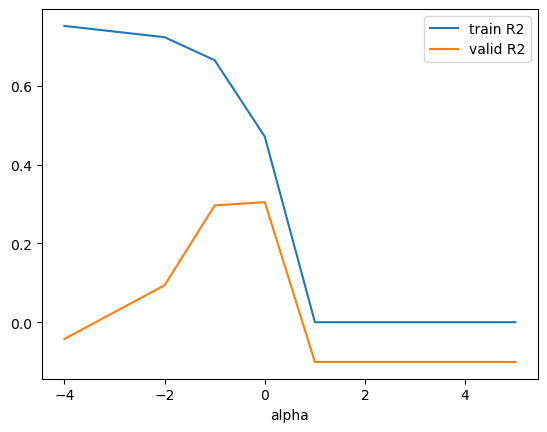

In [26]:
# regularize
gkf = GroupKFold(n_splits=5)
grid = {'alpha':[0.0001,0.01,0.1,1,10,100,1000,10000,100000]}
lasso = Lasso()
lassoCV = GridSearchCV(
    lasso,
    param_grid=grid,
    cv=gkf.split(X3_train, y_train, groups=groups_train),
    scoring='r2',
    return_train_score=True)
lassoCV.fit(X3_train,y_train)

print()
print('best alpha =',lassoCV.best_params_, '  valid R2 =',lassoCV.best_score_.round(3))

results = pd.DataFrame()
results['alpha'] = np.log10(grid['alpha'])
results['train R2'] = lassoCV.cv_results_['mean_train_score']
results['valid R2']  = lassoCV.cv_results_['mean_test_score']
ax1 = results.plot.line(x='alpha',y='train R2')
results.plot.line(x='alpha',y='valid R2',ax=ax1)

lasso = lassoCV.best_estimator_
coef = pd.Series(lasso.coef_,index=X3_train.columns)
coef.sort_values()

In [27]:
test_score = lasso.score(X3_test, y_test)
print('Test R²:', test_score)

Test R²: 0.33265702855850166


## Conclusion

Using the cleaned World Bank data, linear regression performed the best out of the four regressors used with an R2 of 53.5%. The feature that had the highest weight for the linear regressor was land_area.